# Analyse de l'incidence de la varicelle 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
import tqdm.notebook as tqdm

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
filename = "data.csv"

In [4]:
if not os.path.isfile(filename):
    data = pd.read_csv(data_url, skiprows=1)
    data.to_csv(filename, index=False)
    print("Données téléchargées et sauvegardées.")
else:
    print("Données sauvegardées trouvées.")

Données sauvegardées trouvées.


In [5]:
raw_data = pd.read_csv("data.csv")
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202029          7    709       26    1392       1           0   
1     202028          7    728        0    1515       1           0   
2     202027          7    986      148    1824       1           0   
3     202026          7    694        0    1454       1           0   
4     202025          7    228        0     597       0           0   
5     202024          7    388        0     959       1           0   
6     202023          7    558        1    1115       1           0   
7     202022          7    277        0     633       0           0   
8     202021          7    602       36    1168       1           0   
9     202020          7    824       20    1628       1           0   
10    202019          7    310        0     753       0           0   
11    202018          7    849       98    1600       1           0   
12    202017          7    272        0     658       0           0   
13    202016          7    758       78    1438       1           0   
14    202015          7   1918      675    3161       3           1   
15    202014          7   3879     2227    5531       6           3   
16    202013          7   7326     5236    9416      11           8   
17    202012          7   8123     5790   10456      12           8   
18    202011          7  10198     7568   12828      15          11   
19    202010          7   9011     6691   11331      14          10   
20    202009          7  13631    10544   16718      21          16   
21    202008          7  10424     7708   13140      16          12   
22    202007          7   8959     6574   11344      14          10   
23    202006          7   9264     6925   11603      14          10   
24    202005          7   8505     6314   10696      13          10   
25    202004          7   7991     5831   10151      12           9   
26    202003          7   5968     4100    7836       9           6   
27    202002          7   6534     4530    8538      10           7   
28    202001          7   9835     7019   12651      15          11   
29    201952          7   7941     5246   10636      12           8   
...      ...        ...    ...      ...     ...     ...         ...   
1516  199126          7  17608    11304   23912      31          20   
1517  199125          7  16169    10700   21638      28          18   
1518  199124          7  16171    10071   22271      28          17   
1519  199123          7  11947     7671   16223      21          13   
1520  199122          7  15452     9953   20951      27          17   
1521  199121          7  14903     8975   20831      26          16   
1522  199120          7  19053    12742   25364      34          23   
1523  199119          7  16739    11246   22232      29          19   
1524  199118          7  21385    13882   28888      38          25   
1525  199117          7  13462     8877   18047      24          16   
1526  199116          7  14857    10068   19646      26          18   
1527  199115          7  13975     9781   18169      25          18   
1528  199114          7  12265     7684   16846      22          14   
1529  199113          7   9567     6041   13093      17          11   
1530  199112          7  10864     7331   14397      19          13   
1531  199111          7  15574    11184   19964      27          19   
1532  199110          7  16643    11372   21914      29          20   
1533  199109          7  13741     8780   18702      24          15   
1534  199108          7  13289     8813   17765      23          15   
1535  199107          7  12337     8077   16597      22          15   
1536  199106          7  10877     7013   14741      19          12   
1537  199105          7  10442     6544   14340      18          11   
1538  199104          7   7913     4563   11263      14           8   
1539  199103          7  15387    10484   20290      27          18   
1540  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non.

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [7]:
data = raw_data

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [9]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste.

In [10]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

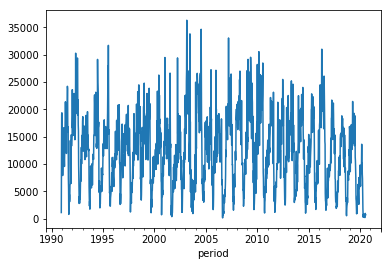

In [11]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des creux en septembre.

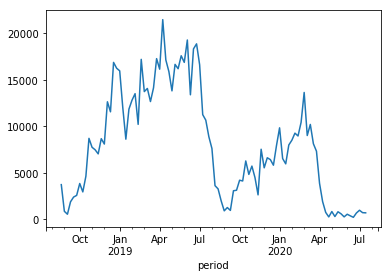

In [19]:
sorted_data['inc'][-100:].plot()

## Etude de l'incidence annuelle

Etant donné que le creux de l'épidémie se situe début septembre, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome grippal est très faible en septembre, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en decembre 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [20]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                        for y in range(1991,
                                       sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [22]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

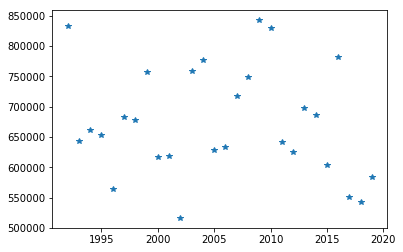

In [23]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [24]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64